In [93]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns 
from scipy.optimize import curve_fit
import pylab
import plotly.express as px
from scipy import stats

In [94]:
ruta_unemployed=r'\Users\Alberto\Documents\Big Data\BigData1\trabajo\unempl_world.csv'
df_unempl=pd.read_csv(ruta_unemployed,sep=',',encoding='latin1')

df_unempl=df_unempl.drop(columns=['Series Code','ï»¿Series Name'])
df_unempl=df_unempl.fillna(0)
df_unempl=df_unempl.replace('..','0')
df_unempl=df_unempl.drop(columns='Country Name')

In [95]:
#df_unempl['2000 [YR2000]']=df_unempl['2000 [YR2000]'].astype('float')
columnas=['2000 [YR2000]', '2001 [YR2001]','2002 [YR2002]', '2003 [YR2003]', '2004 [YR2004]', '2005 [YR2005]','2006 [YR2006]', '2007 [YR2007]', '2008 [YR2008]', '2009 [YR2009]','2010 [YR2010]', '2011 [YR2011]', '2012 [YR2012]', '2013 [YR2013]','2014 [YR2014]', '2015 [YR2015]', '2016 [YR2016]', '2017 [YR2017]','2018 [YR2018]', '2019 [YR2019]', '2020 [YR2020]']

df_unempl[columnas] = df_unempl[columnas].apply(pd.to_numeric) 
df_unempl=pd.pivot_table(df_unempl,index='Country Code')
df_unempl=df_unempl.drop(index=0)
df_unempl


2000 [YR2000]  2001 [YR2001]  2002 [YR2002]  2003 [YR2003]  \
Country Code                                                               
ABW                   0.000       0.000000          0.000       0.000000   
AFG                  11.517      11.513000         11.596      11.604000   
AGO                   3.837       3.835000          3.871       3.875000   
ALB                  16.573      16.566999         16.673      16.684000   
AND                   0.000       0.000000          0.000       0.000000   
...                     ...            ...            ...            ...   
XKX                   0.000       0.000000          0.000       0.000000   
YEM                  11.567      11.700000         11.921      12.069000   
ZAF                  30.229      30.896000         33.473      32.456001   
ZMB                  12.930      13.515000         14.207      14.836000   
ZWE                   5.640       5.309000          5.040       4.733000   

              2004 [YR2004]  2005 [YR2005]  2006 [YR2006]  2007 [YR2007]  \
Country Code                                                               
ABW                   0.000       0.000000       0.000000          0.000   
AFG                  11.528      11.429000      11.224000         11.046   
AGO                   3.842       3.800000       3.712000          3.637   
ALB                  16.586      16.459999      16.195999         15.966   
AND                   0.000       0.000000       0.000000          0.000   
...                     ...            ...            ...            ...   
XKX                   0.000       0.000000       0.000000          0.000   
YEM                  12.130      12.167000      12.088000         12.032   
ZAF                  29.576      29.253000      28.489000         26.666   
ZMB                  15.380      15.900000      12.853000         10.183   
ZWE                   4.390       4.474000       4.496000          4.529   

              2008 [YR2008]  2009 [YR2009]  ...  2011 [YR2011]  2012 [YR2012]  \
Country Code                                ...                                 
ABW                0.000000          0.000  ...          0.000          0.000   
AFG               10.985000         11.387  ...         11.488         11.508   
AGO                3.612000          3.782  ...          7.362          7.379   
ALB               13.060000         13.674  ...         13.481         13.376   
AND                0.000000          0.000  ...          0.000          0.000   
...                     ...            ...  ...            ...            ...   
XKX                0.000000          0.000  ...          0.000          0.000   
YEM               12.101000         12.681  ...         13.080         13.248   
ZAF               22.433001         23.538  ...         24.653         24.732   
ZMB                7.930000         10.506  ...         10.343          7.850   
ZWE                4.628000          5.009  ...          5.368          5.381   

              2013 [YR2013]  2014 [YR2014]  2015 [YR2015]  2016 [YR2016]  \
Country Code                                                               
ABW                   0.000       0.000000          0.000       0.000000   
AFG                  11.534      11.448000         11.387      11.313000   
AGO                   7.400       7.331000          7.282       7.223000   
ALB                  15.866      17.490000         17.080      15.220000   
AND                   0.000       0.000000          0.000       0.000000   
...                     ...            ...            ...            ...   
XKX                   0.000       0.000000          0.000       0.000000   
YEM                  13.424      13.467000         13.395      13.307000   
ZAF                  24.569      24.898001         25.156      26.551001   
ZMB                   8.618       9.340000         10.105      10.882000   
ZWE                   5.399       5.342000          5.302       5.2530

In [96]:
ruta_ipc=r'\Users\Alberto\Documents\Big Data\BigData1\trabajo\ipc_world.csv'
df_ipc=pd.read_csv(ruta_ipc,sep=',',encoding='latin1')

df_ipc=df_ipc.drop(columns=['ï»¿Series Name','Country Name','Series Code'])

df_ipc=df_ipc.fillna(0)
df_ipc=df_ipc.replace('..','0')

columnas=['2000 [YR2000]', '2001 [YR2001]','2002 [YR2002]', '2003 [YR2003]', '2004 [YR2004]', '2005 [YR2005]','2006 [YR2006]', '2007 [YR2007]', '2008 [YR2008]', '2009 [YR2009]','2010 [YR2010]', '2011 [YR2011]', '2012 [YR2012]', '2013 [YR2013]','2014 [YR2014]', '2015 [YR2015]', '2016 [YR2016]', '2017 [YR2017]','2018 [YR2018]', '2019 [YR2019]', '2020 [YR2020]']

df_ipc[columnas] = df_ipc[columnas].apply(pd.to_numeric) 


#df_ipc=df_ipc.drop(index=0)


df_ipc=df_ipc.drop([df_ipc.index[268],df_ipc.index[267],df_ipc.index[266],df_ipc.index[265],df_ipc.index[264]])
df_ipc=pd.pivot_table(df_ipc,index='Country Code')
df_unempl

2000 [YR2000]  2001 [YR2001]  2002 [YR2002]  2003 [YR2003]  \
Country Code                                                               
ABW                   0.000       0.000000          0.000       0.000000   
AFG                  11.517      11.513000         11.596      11.604000   
AGO                   3.837       3.835000          3.871       3.875000   
ALB                  16.573      16.566999         16.673      16.684000   
AND                   0.000       0.000000          0.000       0.000000   
...                     ...            ...            ...            ...   
XKX                   0.000       0.000000          0.000       0.000000   
YEM                  11.567      11.700000         11.921      12.069000   
ZAF                  30.229      30.896000         33.473      32.456001   
ZMB                  12.930      13.515000         14.207      14.836000   
ZWE                   5.640       5.309000          5.040       4.733000   

              2004 [YR2004]  2005 [YR2005]  2006 [YR2006]  2007 [YR2007]  \
Country Code                                                               
ABW                   0.000       0.000000       0.000000          0.000   
AFG                  11.528      11.429000      11.224000         11.046   
AGO                   3.842       3.800000       3.712000          3.637   
ALB                  16.586      16.459999      16.195999         15.966   
AND                   0.000       0.000000       0.000000          0.000   
...                     ...            ...            ...            ...   
XKX                   0.000       0.000000       0.000000          0.000   
YEM                  12.130      12.167000      12.088000         12.032   
ZAF                  29.576      29.253000      28.489000         26.666   
ZMB                  15.380      15.900000      12.853000         10.183   
ZWE                   4.390       4.474000       4.496000          4.529   

              2008 [YR2008]  2009 [YR2009]  ...  2011 [YR2011]  2012 [YR2012]  \
Country Code                                ...                                 
ABW                0.000000          0.000  ...          0.000          0.000   
AFG               10.985000         11.387  ...         11.488         11.508   
AGO                3.612000          3.782  ...          7.362          7.379   
ALB               13.060000         13.674  ...         13.481         13.376   
AND                0.000000          0.000  ...          0.000          0.000   
...                     ...            ...  ...            ...            ...   
XKX                0.000000          0.000  ...          0.000          0.000   
YEM               12.101000         12.681  ...         13.080         13.248   
ZAF               22.433001         23.538  ...         24.653         24.732   
ZMB                7.930000         10.506  ...         10.343          7.850   
ZWE                4.628000          5.009  ...          5.368          5.381   

              2013 [YR2013]  2014 [YR2014]  2015 [YR2015]  2016 [YR2016]  \
Country Code                                                               
ABW                   0.000       0.000000          0.000       0.000000   
AFG                  11.534      11.448000         11.387      11.313000   
AGO                   7.400       7.331000          7.282       7.223000   
ALB                  15.866      17.490000         17.080      15.220000   
AND                   0.000       0.000000          0.000       0.000000   
...                     ...            ...            ...            ...   
XKX                   0.000       0.000000          0.000       0.000000   
YEM                  13.424      13.467000         13.395      13.307000   
ZAF                  24.569      24.898001         25.156      26.551001   
ZMB                   8.618       9.340000         10.105      10.882000   
ZWE                   5.399       5.342000          5.302       5.2530

Text(5.791142872401647, 2.9300309996642504, 'Mean all countries')

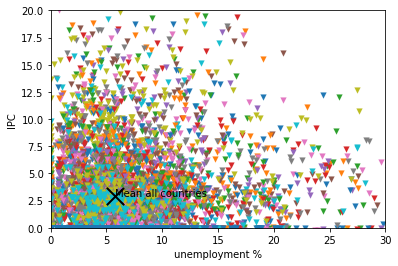

In [97]:
#pintamos todos los puntos de todos los países en todos los años
for col in df_unempl.columns:
    plt.scatter(df_unempl[col], df_ipc[col], label=col,linewidths=0.1,marker='v')
    

plt.xlabel('unemployment %')
plt.ylabel('IPC')
plt.ylim(0,20)
plt.xlim(0,30)

df_ipc_mean=df_ipc.mean(axis=1).median()
df_unempl_mean=df_unempl.mean(axis=1).median()
#pintamos con una cruz en el gráfico la media de desempleo e inflación para todos los países y todos los años 2000-2020
plt.scatter(df_unempl_mean,df_ipc_mean,s=300, marker='x',c='black',linewidths=2)

plt.text(df_unempl_mean,df_ipc_mean,'Mean all countries')

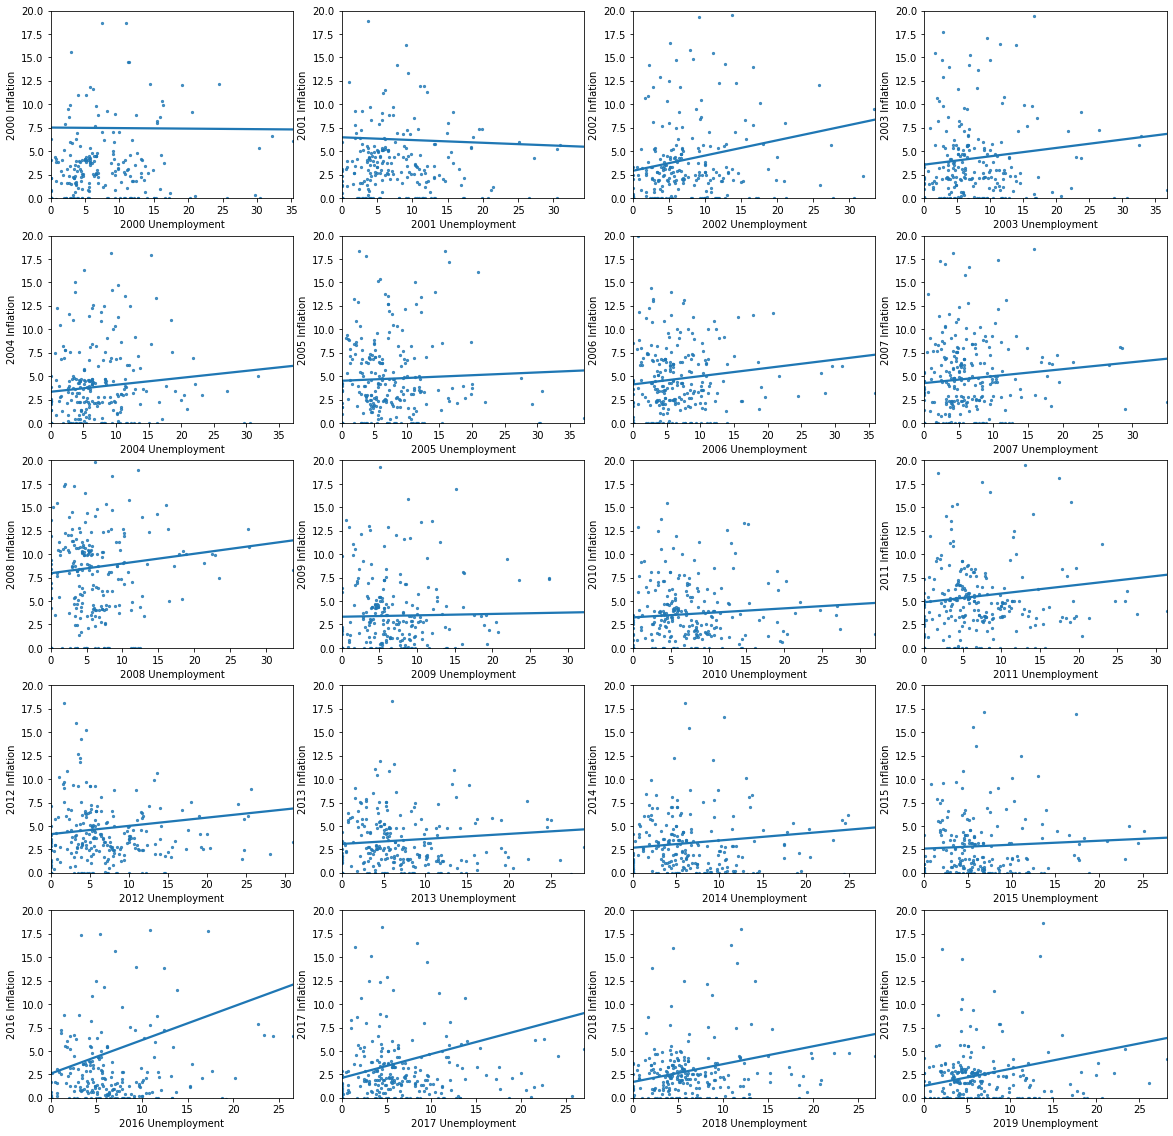

In [98]:
    #removemos outliers en desempleo.
    unempl_z=stats.zscore(unempl)
    abs_z_unempl=np.abs(unempl_z)
    filtered_unempl=(abs_z_unempl<3).all(axis=1)




    unempl=df_unempl
    deflac=df_ipc

    z=pd.merge_ordered(unempl,deflac,on='Country Code',how='inner')
    z=z.fillna(0)

    fig, axs = plt.subplots(5, 4, figsize=(20,20))
    for i, ax in enumerate(axs.ravel()):
        year=2000+i
        grafo=sns.regplot(x=f'{year} [YR{year}]_x', y=f'{year} [YR{year}]_y', data=z,order=1, 
               ci=None, scatter_kws={"s": 5}, ax=ax)
        ax.set(xlabel=f'{year} Unemployment', ylabel=f'{year} Inflation')
        grafo.set(ylim=(0,20))





In [99]:

unempl=df_unempl
deflac=df_ipc
z=pd.merge_ordered(unempl,deflac,on='Country Code',how='inner')
z=z.fillna(0)

#por si queremos observar dentro de los gráficos los valores de cada país

for i, ax in enumerate(axs.ravel()):
       
        year=2000+i
        unempl_axname=f'{year} [YR{year}]_x'
        inflation_axname=f'{year} [YR{year}]_y'
        grafo=px.scatter(z,x=unempl_axname, y=inflation_axname,hover_name='Country Code',title='Trade-off between Unemployment rate and inflation',trendline='ols',
        labels={f'{year} [YR{year}]_x': f'{year} Unemployment',
                f'{year} [YR{year}]_y': f'{year} Inflation'})
     
        grafo.update_yaxes(range=[0, 20]) 
        

        grafo.show()

                            OLS Regression Results                            
Dep. Variable:                    LSO   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                 -0.014
Method:                 Least Squares   F-statistic:                    0.7323
Date:                Mon, 04 Jan 2021   Prob (F-statistic):              0.403
Time:                        12:29:23   Log-Likelihood:                -57.803
No. Observations:                  21   AIC:                             119.6
Df Residuals:                      19   BIC:                             121.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         27.1053      1.130     23.979      0.0

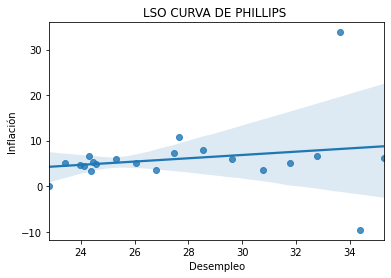

In [118]:
import statsmodels.api as sm
def buscarphillips():

    pais=input('Introduce el código del país a estimar: (mayus)')
    #SACANDO DATOS PAIS
    datospais_ipc=df_ipc.loc[pais]
    datospais_unempl=df_unempl.loc[pais]

    
    # Building the model
    Y=datospais_unempl
    X=datospais_ipc
    X=sm.add_constant(X)

    model=sm.OLS(Y,X).fit()
    predictions=model.predict(X)
    print_model=model.summary()
    print(print_model)

    #GRAFICO SCATTER 
    sns.regplot(x=datospais_unempl,y=datospais_ipc)

    plt.title(f'{pais} CURVA DE PHILLIPS ')
    plt.xlabel('Desempleo')
    plt.ylabel('Inflación')

    

buscarphillips()

In [102]:
df_unempl_mean=df_unempl.mean(axis=1)
df_ipc_mean=df_ipc.mean(axis=1)

df_ipc_mean=pd.DataFrame(df_ipc_mean, columns=['IPC_mean'])
df_unempl_mean=pd.DataFrame(df_unempl_mean, columns=['Unempl_mean'])

df_mean=pd.merge(df_ipc_mean,df_unempl_mean,on='Country Code')
df_mean.sort_values(by='Unempl_mean')


IPC_mean  Unempl_mean
Country Code                       
ABW           2.243685     0.000000
SYC           5.645182     0.000000
SXM           1.298114     0.000000
SMR           1.285659     0.000000
PLW           2.289251     0.000000
...                ...          ...
SWZ           6.498003    25.260476
BIH           1.027225    25.859143
ZAF           5.045631    27.281429
LSO           6.024385    27.722286
MKD           2.018201    29.581238

[264 rows x 2 columns]

In [108]:
df_mean['Unempl_intervals'] = pd.qcut(df_mean.Unempl_mean,3)

df_pivot_phil=pd.pivot_table(df_mean,index=['Unempl_intervals','Country Code'])

#quitamos los valores iguales a 0. No tiene sentido valores 0 aquí.
df_pivot_phil=df_pivot_phil.loc[(df_pivot_phil!=0).all(axis=1)]
df_pivot_phil


df_pivot_phil['level of Unemployment']=['High' if s>15.0  else ('Medium' if 10.0<s<15.0 else 'Low') for s in df_pivot_phil['Unempl_mean']]

df_pivot_phil=pd.pivot_table(df_pivot_phil,index=['level of Unemployment','Country Code'])
df_pivot_phil


IPC_mean  Unempl_mean
level of Unemployment Country Code                        
High                  ALB            2.295268    15.060571
                      BIH            1.027225    25.859143
                      BWA            6.463501    18.319143
                      ESP            1.997778    15.729048
                      GAB            2.000414    18.979714
...                                       ...          ...
Medium                TMN            4.052028    11.582034
                      TUN            3.750828    14.755285
                      TUR           15.527867    10.120476
                      YEM            7.938559    12.628714
                      ZMB           12.398249    11.644333

[216 rows x 2 columns]

array([<AxesSubplot:ylabel='IPC_mean'>], dtype=object)

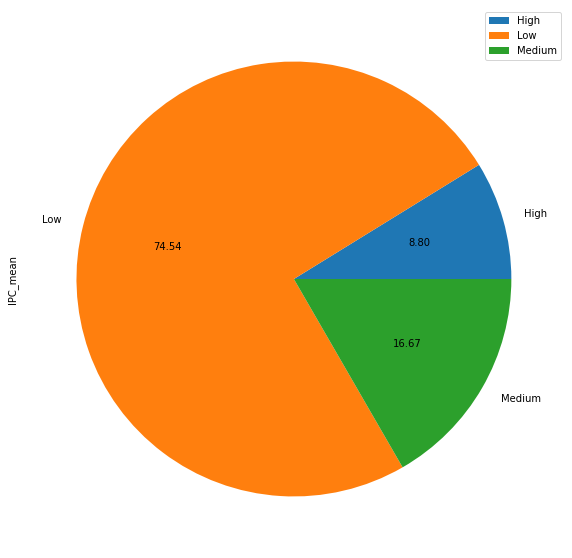

In [119]:
df_pivot_phil.sort_values(by='Unempl_mean')
df_pivot_phil.groupby(by='level of Unemployment').count().plot.pie(y='IPC_mean',subplots=True,figsize=(10,10),autopct='%.2f')



In [36]:
df_pivot_phil.sort_values(by='Unempl_mean',ascending=False).head(50)

IPC_mean  Unempl_mean
level of Unemployment Country Code                        
High                  MKD            2.018201    29.581238
                      LSO            6.024385    27.722286
                      ZAF            5.045631    27.281429
                      BIH            1.027225    25.859143
                      SWZ            6.498003    25.260476
                      PSE            2.631619    21.726571
                      MNE            1.691027    21.719524
                      NAM            4.545054    20.804571
                      VCT            1.924424    19.644619
                      LCA            1.854008    19.223143
                      GAB            2.000414    18.979714
                      LBY            1.155466    18.842476
                      BWA            6.463501    18.319143
                      SRB           14.529749    16.885857
                      SDN           19.439984    16.052619
                      ESP            1.997778    15.729048
                      GRC            1.825336    15.575143
                      GEO            4.575240    15.440762
                      ALB            2.295268    15.060571
Medium                TUN            3.750828    14.755285
                      ARM            3.324283    14.742333
                      STP           11.428946    14.732524
                      DZA            3.746462    14.599619
                      NCL            0.323046    14.558286
                      COG            2.375478    14.380667
                      JOR            3.101198    13.819809
                      HTI           10.068892    13.671095
                      SVK            3.343316    12.906476
                      YEM            7.938559    12.628714
                      HRV            2.012994    12.601762
                      SSD           34.318552    12.537238
                      TJK            8.522548    12.220667
                      JAM            8.242812    12.011667
                      MNA            3.827343    11.672568
                      ZMB           12.398249    11.644333
                      IRN           16.838772    11.634810
                      TMN            4.052028    11.582034
                      GUY            3.837597    11.573571
                      COL            4.762820    11.424857
                      AFG            4.374729    11.357809
                      LVA            3.488347    11.244905
                      CPV            1.535764    11.181429
                      BHS            2.565259    11.021810
                      OSS            3.316044    10.893740
                      POL            2.436690    10.813286
                      EGY            9.116970    10.800571
                      ARB            3.176617    10.683783
                      DJI            2.638154    10.553619
                      LTU            2.316248    10.435952
                      MEA            2.889964    10.357316

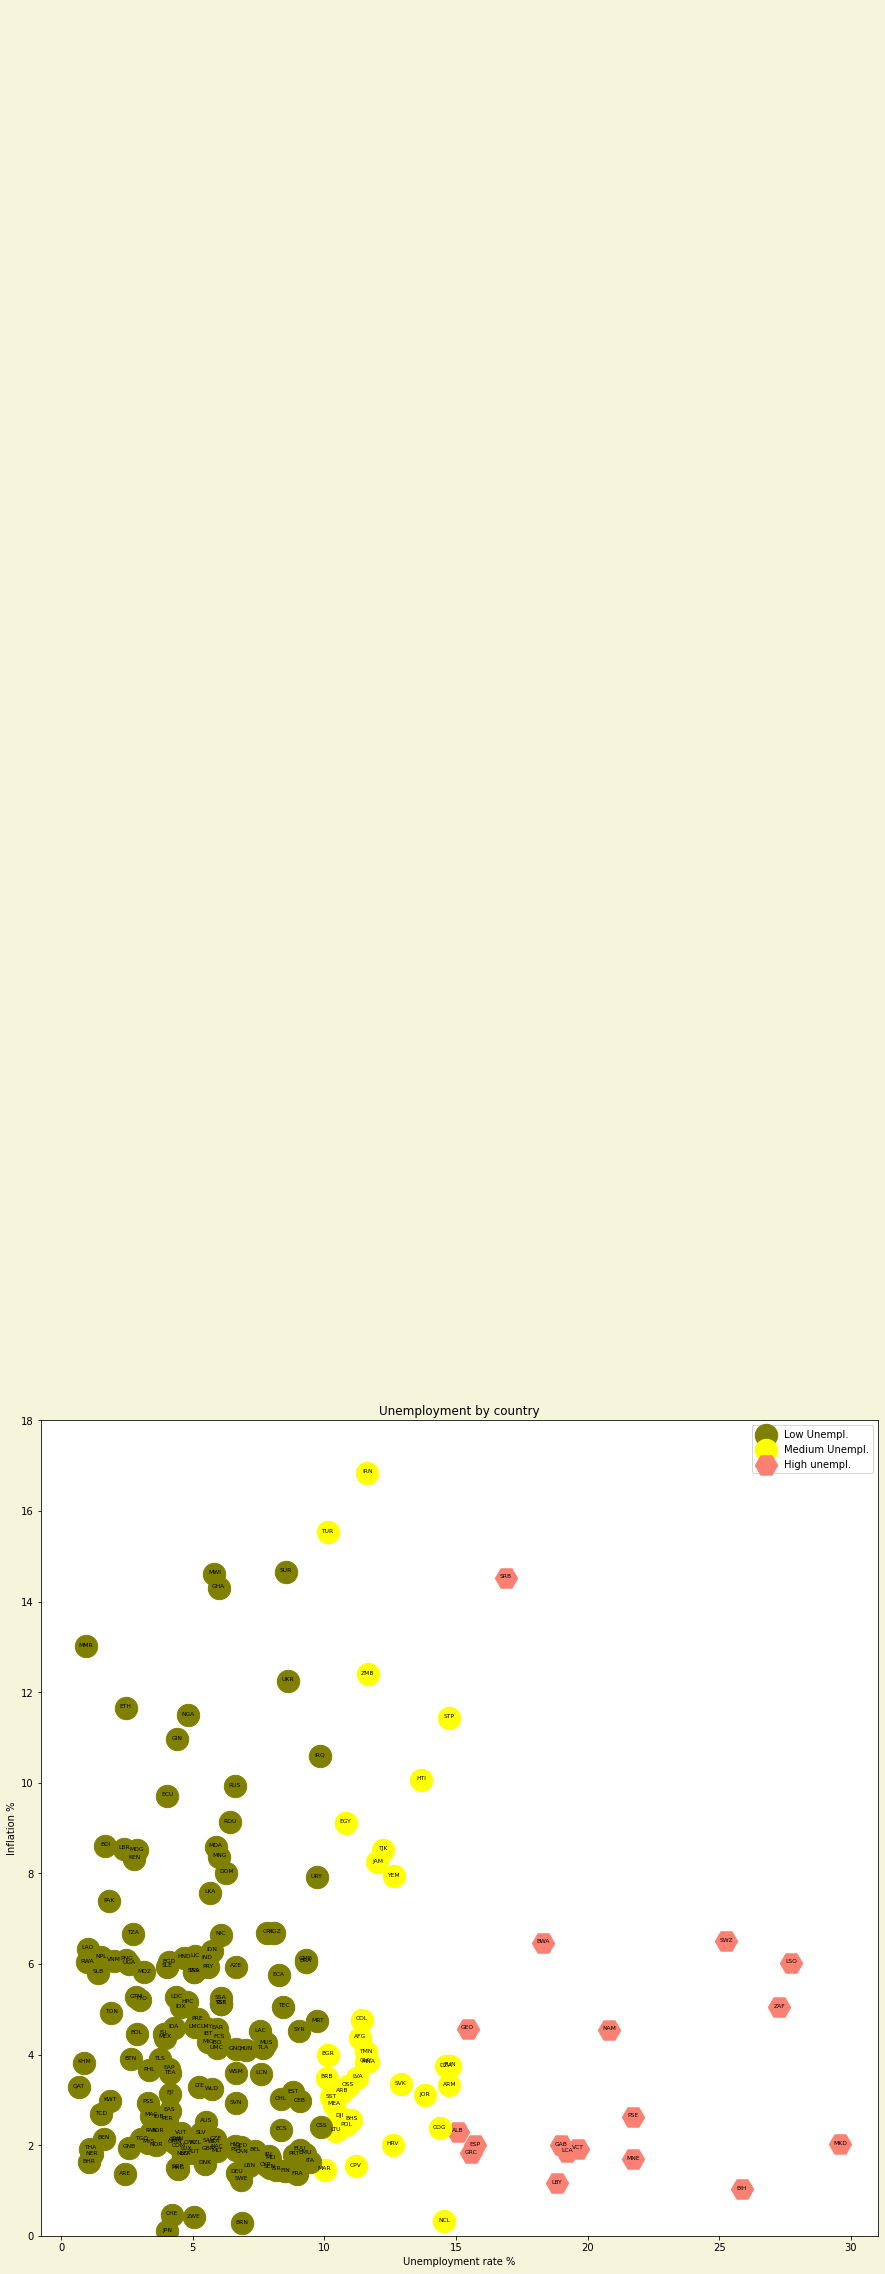

In [125]:
#plotting the scatter plot
#df_pivot_phil=df_pivot_phil.reset_index()
z=df_pivot_phil['Country Code']
x_high=df_pivot_phil['Unempl_mean'].where(df_pivot_phil['level of Unemployment']=='High')
x_med=df_pivot_phil['Unempl_mean'].where(df_pivot_phil['level of Unemployment']=='Medium')
x_low=df_pivot_phil['Unempl_mean'].where(df_pivot_phil['level of Unemployment']=='Low')
y=df_pivot_phil['IPC_mean']

total=x_high[i],x_med[i],x_low[i]

fig, ax = plt.subplots(figsize=(15,15),facecolor='beige')
plt.title('Unemployment by country')
plt.ylabel('Inflation %')
plt.xlabel('Unemployment rate %')
plt.ylim(0,18)

high= ax.scatter(x_high, y,c='salmon',s=500,marker='H')
med= ax.scatter(x_med, y,c='yellow',s=500,marker='o')
low= ax.scatter(x_low, y,c='olive',s=500)
plt.legend((low,med,high),('Low Unempl.','Medium Unempl.','High unempl.'))


for i, txt in enumerate(z.ravel()):
    ax.annotate(txt, (x_high[i],y[i]),ha='center',size=6)
    ax.annotate(txt, (x_med[i], y[i]),ha='center',size=6)
    ax.annotate(txt, (x_low[i], y[i]),ha='center',size=6)
    
    
   

In [27]:
'''
The indicator is calculated by dividing the number of employed people within the age group 20-64 years having attained a specific level of education by the total population of the same age group and with the same educational attainment level.

- Less than primary, primary and lower secondary education (ISCED levels 0-2)

-Upper secondary and post-secondary non-tertiary education (ISCED levels 3 and 4)

-Tertiary education (ISCED levels 5-8) (ISCED 1997: levels 5 and 6)

'''

import pandas as pd
ruta2=r'\Users\Alberto\Documents\Big Data\BigData1\trabajo\unemployed_byed.csv'
df_ed=pd.read_csv(ruta2,delimiter=',')


df_ed=df_ed.replace('b','',regex=True)
df_ed=df_ed.replace(':','0',regex=True)
x=df_ed['sex;age;isced11;geo\TIME_PERIOD'].str.split(';',expand=True)
df_ed['sex']=x[0]
df_ed['age']=x[1]
df_ed['Education']=x[2]
df_ed['Country']=x[3]

df_ed=df_ed.drop(columns='sex;age;isced11;geo\TIME_PERIOD')
#df_ed=df_ed.drop(columns=['2005','2006','2007'])

df_ed= df_ed.reindex(columns=['sex','age', 'Education', 'Country', '2008 ', '2009 ', '2010 ', '2011 ', '2012 ','2013 ', '2014 ', '2015 ', '2016 ', '2017 ', '2018 ', '2019 '])
df_ed=df_ed.rename(columns={'Country':'Country Code'})

cols=['2008 ', '2009 ', '2010 ', '2011 ', '2012 ','2013 ', '2014 ', '2015 ', '2016 ', '2017 ', '2018 ', '2019 ']
df_ed[cols]=df_ed[cols].astype('float')
df_ed




sex     age Education Country Code  2008   2009   2010   2011   2012   \
0     T  Y20-64     ED0-2           AT   55.7   54.0   54.9   55.3   54.7   
1     T  Y20-64     ED0-2           BE   49.1   47.7   48.4   47.3   47.1   
2     T  Y20-64     ED0-2           BG   46.5   45.0   39.8   36.7   36.2   
3     T  Y20-64     ED0-2           CH   69.0   69.0   67.1   67.7   68.1   
4     T  Y20-64     ED0-2           CY   64.1   64.9   66.8   65.1   57.8   
..   ..     ...       ...          ...    ...    ...    ...    ...    ...   
109   T  Y20-64     ED5-8           SE   87.7   86.6   86.3   86.9   87.0   
110   T  Y20-64     ED5-8           SI   87.5   88.1   86.6   85.5   84.2   
111   T  Y20-64     ED5-8           SK   83.8   80.3   78.0   76.7   74.8   
112   T  Y20-64     ED5-8           TR   71.7   70.6   72.0   72.8   72.9   
113   T  Y20-64     ED5-8           UK   85.4   84.4   84.1   82.7   83.2   

     2013   2014   2015   2016   2017   2018   2019   
0     53.9   53.1   53.1   53.9   53.9   55.6   55.7  
1     46.8   46.6   45.6   45.6   45.9   45.6   46.3  
2     36.9   38.6   39.0   39.2   44.4   46.2   51.2  
3     67.9   67.9   68.1   68.1   67.7   69.2   69.7  
4     54.9   54.6   55.1   56.8   57.0   61.6   63.2  
..     ...    ...    ...    ...    ...    ...    ...  
109   87.3   87.4   87.7   88.1   88.1   88.6   88.8  
110   82.4   82.0   83.1   84.0   86.2   88.0   89.5  
111   74.7   75.6   76.5   77.3   78.5   79.3   80.6  
112   73.7   72.8   73.1   71.9   72.0   71.7   70.8  
113   83.9   84.4   84.8   85.0   85.1   85.4   86.0  

[114 rows x 16 columns]

In [28]:
df_ed_low=df_ed.loc[df_ed['Education']=='ED0-2']

df_ed_low=pd.pivot_table(df_ed_low,index=['sex','Country Code','Education'])
df_ed_low['Mean unemployment']=df_ed_low.mean(axis='columns')
#since we have the ocupation rate, we just have to rest that value with 100 to obtain the unemployment rate. P 
df_ed_low=100-df_ed_low['Mean unemployment']

df_ed_low=df_ed_low.to_frame(name='Mean Unempl')
df_ed_low.head()



Mean Unempl
sex Country Code Education             
T   AT           ED0-2        45.516667
    BE           ED0-2        53.166667
    BG           ED0-2        58.358333
    CH           ED0-2        31.708333
    CY           ED0-2        39.841667

In [29]:
df_ed_med=df_ed.loc[df_ed['Education']=='ED3_4']

df_ed_med=pd.pivot_table(df_ed_med,index=['sex','Country Code','Education'])
df_ed_med['Mean unemployment']=df_ed_med.mean(axis='columns')
df_ed_med=100-df_ed_med['Mean unemployment']

df_ed_med=df_ed_med.to_frame(name='Mean Unempl')
df_ed_med.head()

Mean Unempl
sex Country Code Education             
T   AT           ED3_4        24.033333
    BE           ED3_4        31.441667
    BG           ED3_4        30.608333
    CH           ED3_4        19.558333
    CY           ED3_4        30.475000

In [30]:
df_ed_high=df_ed.loc[df_ed['Education']=='ED5-8']

df_ed_high=pd.pivot_table(df_ed_high,index=['sex','Country Code','Education'])
df_ed_high['Mean unemployment']=df_ed_high.mean(axis='columns')
df_ed_high=100-df_ed_high['Mean unemployment']

df_ed_high=df_ed_high.to_frame(name='Mean Unempl')
df_ed_high.head()



Mean Unempl
sex Country Code Education             
T   AT           ED5-8        15.191667
    BE           ED5-8        17.741667
    BG           ED5-8        16.058333
    CH           ED5-8        11.783333
    CY           ED5-8        19.408333

In [31]:
#df_pivot_phil=df_pivot_phil.reset_index()
#df_ed_low=df_ed_low.reset_index()

one=df_ed_low.merge(df_ed_med, on='Country Code',how='outer')
df_ed=one.merge(df_ed_high,on='Country Code',how='outer')
df_ed=df_ed.rename(columns={'Mean Unempl_x':'Unempl low ed.level','Mean Unempl_y':'Unempl med ed.level', 'Mean Unempl':'Unempl high ed.level'})
df_ed.head()

Unempl low ed.level  Unempl med ed.level  Unempl high ed.level
Country Code                                                                
AT                      45.516667            24.033333             15.191667
BE                      53.166667            31.441667             17.741667
BG                      58.358333            30.608333             16.058333
CH                      31.708333            19.558333             11.783333
CY                      39.841667            30.475000             19.408333

In [32]:
ruta3=r'\Users\Alberto\Documents\Big Data\BigData1\trabajo\unemployed_total.csv'
df_unempl_total=pd.read_csv(ruta3,delimiter=',',encoding='latin8')
df_unempl_total


df_unempl_total=df_unempl_total.rename(columns={'geo\TIME_PERIOD':'Country Code'})
df_unempl_total=df_unempl_total.replace('b','',regex=True)
df_unempl_total=df_unempl_total.replace('e','',regex=True)
df_unempl_total=df_unempl_total.replace(':','0',regex=True)

cols=['2008 ', '2009 ', '2010 ', '2011 ', '2012 ','2013 ', '2014 ', '2015 ', '2016 ', '2017 ', '2018 ', '2019 ']
df_unempl_total[cols]=df_unempl_total[cols].astype('float')

df_unempl_total.head(
)



Country Name Country Code  2008   2009   2010   2011   2012   2013   2014   \
0      Austria           AT    4.1    5.3    4.8    4.6    4.9    5.4    5.6   
1       Blgium           BE    7.0    7.9    8.3    7.2    7.6    8.4    8.5   
2     Bulgaria           BG    5.6    6.8   10.3   11.3   12.3   13.0   11.4   
3   Switzrland           CH    0.0    0.0    4.8    4.4    4.5    4.8    4.9   
4       Cyprus           CY    3.7    5.4    6.3    7.9   11.9   15.9   16.1   

   2015   2016   2017   2018   2019   
0    5.7    6.0    5.5    4.9    4.5  
1    8.5    7.8    7.1    6.0    5.4  
2    9.2    7.6    6.2    5.2    4.2  
3    4.8    5.0    4.8    4.7    4.4  
4   15.0   13.0   11.1    8.4    7.1

In [33]:
listapaises=df_unempl_total['Country Code']
listapaises=listapaises.to_frame()
listapaises['Country Name']=df_unempl_total['Country Name']
listapaises['Country Code']=df_unempl_total['Country Code']
listapaises.head()

Country Code Country Name
0           AT      Austria
1           BE       Blgium
2           BG     Bulgaria
3           CH   Switzrland
4           CY       Cyprus

In [34]:
df_unempl_total=pd.pivot_table(df_unempl_total,index=['Country Code'])

df_unempl_total['Unempl total Mean']=df_unempl_total.mean(axis='columns')
df_unempl_total=df_unempl_total['Unempl total Mean']
df_unempl_total=df_unempl_total.to_frame()

df_unempl_total.head(5)


Unempl total Mean
Country Code                   
AT                     5.108333
BE                     7.475000
BG                     8.591667
CH                     3.925000
CY                    10.150000

In [35]:
df_unempl_pivot=df_unempl_total.merge(df_ed,on='Country Code')
df_unempl_pivot=listapaises.merge(df_unempl_pivot,on='Country Code')
df_unempl_pivot=df_unempl_pivot.sort_values(by='Unempl high ed.level')
df_unempl_pivot

Country Code                                  Country Name  \
19           IS                                        Icland   
28           NO                                        Norway   
21           LT                                     Lithuania   
3            CH                                    Switzrland   
6            DE  Grmany (until 1990 formr trritory of th FRG)   
33           SE                                          Swdn   
26           MT                                         Malta   
27           NL                                     Nthrlands   
7            DK                                        Dnmark   
34           SI                                       Slovnia   
23           LV                                        Latvia   
31           RO                                       Romania   
0            AT                                       Austria   
37           UK                                 Unitd Kingdom   
29           PL                                        Poland   
14           FI                                       Finland   
2            BG                                      Bulgaria   
22           LU                                      Luxmourg   
9            EE                                       Estonia   
13         EU28                                         EU_28   
5            CZ                                        Czchia   
12    EU27_2020                                         EU_27   
8          EA19                                     EU-19 Ara   
1            BE                                        Blgium   
18           IE                                        Irland   
30           PT                                      Portugal   
15           FR                                         Franc   
17           HU                                       Hungary   
4            CY                                        Cyprus   
16           HR                                       Croatia   
35           SK                                      Slovakia   
11           ES                                         Spain   
20           IT                                         Italy   
10           EL                                           Grc   
36           TR                                         Turky   
25           MK                                North Macdonia   
32           RS                                          Sria   
24           ME                                      Montngro   

    Unempl total Mean  Unempl low ed.level  Unempl med ed.level  \
19           4.741667            23.266667            15.883333   
28           3.583333            37.266667            20.925000   
21          10.441667            60.175000            33.858333   
3            3.925000            31.708333            19.558333   
6            5.225000            41.775000            22.383333   
33           7.450000            37.658333            18.691667   
26           5.466667            45.241667            22.158333   
27           5.300000            38.625000            21.441667   
7            6.325000            39.766667            22.208333   
34           7.308333            51.125000            30.400000   
23          11.708333            47.833333            31.625000   
31           6.108333            46.000000            33.808333   
0            5.108333            45.516667            24.033333   
37           6.066667            40.466667            23.183333   
29           7.491667            59.783333            35.125000   
14           8.025000            46.716667            27.683333   
2            8.591667            58.358333            30.608333   
22           5.508333            41.708333            33.125000   
9            8.550000            43.500000            27.041667   
13           8.766667            46.183333            28.925000   
5            5.116667            56.058333            24.700

In [36]:
df_unempl_pivot.corr()

Unempl total Mean  Unempl low ed.level  \
Unempl total Mean              1.000000             0.450399   
Unempl low ed.level            0.450399             1.000000   
Unempl med ed.level            0.605653             0.758179   
Unempl high ed.level           0.534443             0.672887   

                      Unempl med ed.level  Unempl high ed.level  
Unempl total Mean                0.605653              0.534443  
Unempl low ed.level              0.758179              0.672887  
Unempl med ed.level              1.000000              0.911661  
Unempl high ed.level             0.911661              1.000000

In [37]:
ruta4=r'\Users\Alberto\Documents\Big Data\BigData1\trabajo\purchasingpower.csv'
df_purchase_power=pd.read_csv(ruta4,delimiter=';',encoding='latin8')
df_purchase_power=df_purchase_power.rename(columns={'ïṠṡGEO/TIME':'Country Name'})

cols=['2008', '2009', '2010', '2011', '2012', '2013', '2014','2015', '2016', '2017', '2018', '2019']
df_purchase_power[cols]=df_purchase_power[cols].astype('int')

df_purchase_power=pd.pivot_table(df_purchase_power,index=['Country Name'])
df_purchase_power=df_purchase_power.pct_change(periods=1,axis='columns')
df_purchase_power['Mean purchase power']=df_purchase_power.mean(axis='columns')


df_purchase_power=df_purchase_power['Mean purchase power'].to_frame()


df_purchase_power.head()

Mean purchase power
Country Name                     
Albania                  0.035252
Austria                  0.020023
Belgium                  0.023156
Bulgaria                 0.030607
Croatia                  0.019112

<AxesSubplot:>

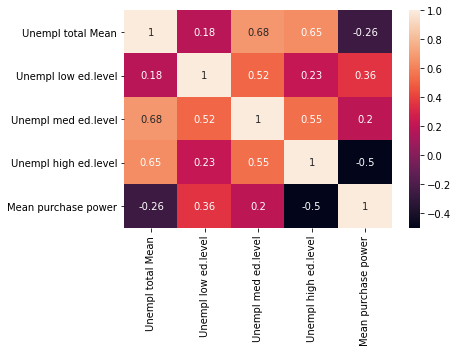

In [38]:
df_unempl_pivot2=df_unempl_pivot.merge(df_purchase_power,on='Country Name',how='inner',indicator=False)
df_unempl_heatmap=df_unempl_pivot2.corr()
sns.heatmap(df_unempl_heatmap,annot=True)

In [39]:
df_unempl_pivot2

Country Code Country Name  Unempl total Mean  Unempl low ed.level  \
0            NO       Norway           3.583333            37.266667   
1            LT    Lithuania          10.441667            60.175000   
2            MT        Malta           5.466667            45.241667   
3            LV       Latvia          11.708333            47.833333   
4            RO      Romania           6.108333            46.000000   
5            AT      Austria           5.108333            45.516667   
6            PL       Poland           7.491667            59.783333   
7            FI      Finland           8.025000            46.716667   
8            BG     Bulgaria           8.591667            58.358333   
9            EE      Estonia           8.550000            43.500000   
10           PT     Portugal          11.158333            33.875000   
11           HU      Hungary           7.675000            55.983333   
12           CY       Cyprus          10.150000            39.841667   
13           HR      Croatia          12.450000            59.083333   
14           SK     Slovakia          11.041667            67.625000   
15           ES        Spain          19.516667            47.225000   
16           IT        Italy          10.191667            49.600000   

    Unempl med ed.level  Unempl high ed.level  Mean purchase power  
0             20.925000             11.150000             0.013476  
1             33.858333             11.716667             0.040065  
2             22.158333             12.666667             0.020396  
3             31.625000             14.791667             0.037226  
4             33.808333             14.925000             0.049102  
5             24.033333             15.191667             0.020023  
6             35.125000             15.541667             0.038073  
7             27.683333             15.650000             0.016809  
8             30.608333             16.058333             0.030607  
9             27.041667             16.850000             0.032731  
10            28.800000             17.975000             0.012239  
11            32.241667             18.975000             0.023847  
12            30.475000             19.408333             0.002983  
13            37.875000             20.266667             0.019112  
14            30.383333             21.991667             0.019042  
15            37.008333             22.066667             0.009579  
16            34.116667             22.758333             0.008679

In [40]:
ruta5=r'\Users\Alberto\Documents\Big Data\BigData1\trabajo\pibpc.csv'
df_pibpc=pd.read_csv(ruta5,delimiter=',',encoding='latin8')
df_pibpc=df_pibpc.rename(columns={'geo\TIME_PERIOD':'Country Code'})
df_pibpc=df_pibpc.replace(': ','0')
df_pibpc=df_pibpc.replace(' e','',regex=True)
df_pibpc=df_pibpc.replace('b','',regex=True)
df_pibpc=df_pibpc.replace('p','',regex=True)
cols=['2008 ', '2009 ', '2010 ', '2011 ', '2012 ', '2013 ', '2014 ','2015 ', '2016 ', '2017 ', '2018 ', '2019 ']
df_pibpc[cols]=df_pibpc[cols].astype('float')

df_pibpc=pd.pivot_table(df_pibpc,index=['Country Code'])
df_pibpc=df_pibpc.mean(axis='columns').to_frame()
df_pibpc['PIBpc % growth rate']=df_pibpc
df_pibpc=df_pibpc.drop(columns=0)



df_pibpc=df_pibpc.merge(df_unempl_pivot2,on='Country Code',how='inner')
df_pibpc #growth rate between 2008-2019


Country Code  PIBpc % growth rate Country Name  Unempl total Mean  \
0            AT             0.816667      Austria           5.108333   
1            BG             2.595833     Bulgaria           8.591667   
2            CY             0.712500       Cyprus          10.150000   
3            EE             1.541667      Estonia           8.550000   
4            ES             0.462500        Spain          19.516667   
5            FI             0.204167      Finland           8.025000   
6            HR             0.662500      Croatia          12.450000   
7            HU             1.975000      Hungary           7.675000   
8            IT            -0.404167        Italy          10.191667   
9            LT             2.575000    Lithuania          10.441667   
10           LV             1.245833       Latvia          11.708333   
11           MT             3.866667        Malta           5.466667   
12           NO             0.595833       Norway           3.583333   
13           PL             3.579167       Poland           7.491667   
14           PT             0.545833     Portugal          11.158333   
15           RO             3.225000      Romania           6.108333   
16           SK             2.454167     Slovakia          11.041667   

    Unempl low ed.level  Unempl med ed.level  Unempl high ed.level  \
0             45.516667            24.033333             15.191667   
1             58.358333            30.608333             16.058333   
2             39.841667            30.475000             19.408333   
3             43.500000            27.041667             16.850000   
4             47.225000            37.008333             22.066667   
5             46.716667            27.683333             15.650000   
6             59.083333            37.875000             20.266667   
7             55.983333            32.241667             18.975000   
8             49.600000            34.116667             22.758333   
9             60.175000            33.858333             11.716667   
10            47.833333            31.625000             14.791667   
11            45.241667            22.158333             12.666667   
12            37.266667            20.925000             11.150000   
13            59.783333            35.125000             15.541667   
14            33.875000            28.800000             17.975000   
15            46.000000            33.808333             14.925000   
16            67.625000            30.383333             21.991667   

    Mean purchase power  
0              0.020023  
1              0.030607  
2              0.002983  
3              0.032731  
4              0.009579  
5              0.016809  
6              0.019112  
7              0.023847  
8              0.008679  
9              0.040065  
10             0.037226  
11             0.020396  
12             0.013476  
13             0.038073  
14             0.012239  
15             0.049102  
16             0.019042

array([[<AxesSubplot:xlabel='PIBpc % growth rate', ylabel='PIBpc % growth rate'>,
        <AxesSubplot:xlabel='Unempl total Mean', ylabel='PIBpc % growth rate'>,
        <AxesSubplot:xlabel='Unempl low ed.level', ylabel='PIBpc % growth rate'>,
        <AxesSubplot:xlabel='Unempl med ed.level', ylabel='PIBpc % growth rate'>,
        <AxesSubplot:xlabel='Unempl high ed.level', ylabel='PIBpc % growth rate'>,
        <AxesSubplot:xlabel='Mean purchase power', ylabel='PIBpc % growth rate'>],
       [<AxesSubplot:xlabel='PIBpc % growth rate', ylabel='Unempl total Mean'>,
        <AxesSubplot:xlabel='Unempl total Mean', ylabel='Unempl total Mean'>,
        <AxesSubplot:xlabel='Unempl low ed.level', ylabel='Unempl total Mean'>,
        <AxesSubplot:xlabel='Unempl med ed.level', ylabel='Unempl total Mean'>,
        <AxesSubplot:xlabel='Unempl high ed.level', ylabel='Unempl total Mean'>,
        <AxesSubplot:xlabel='Mean purchase power', ylabel='Unempl total Mean'>],
       [<AxesSubplot:xlabel=

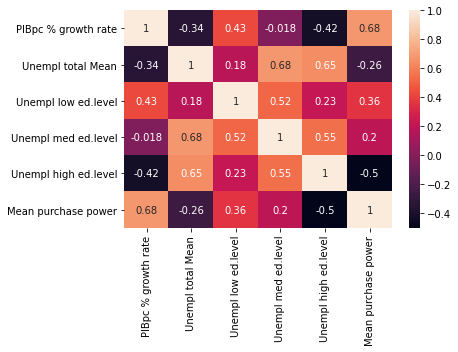

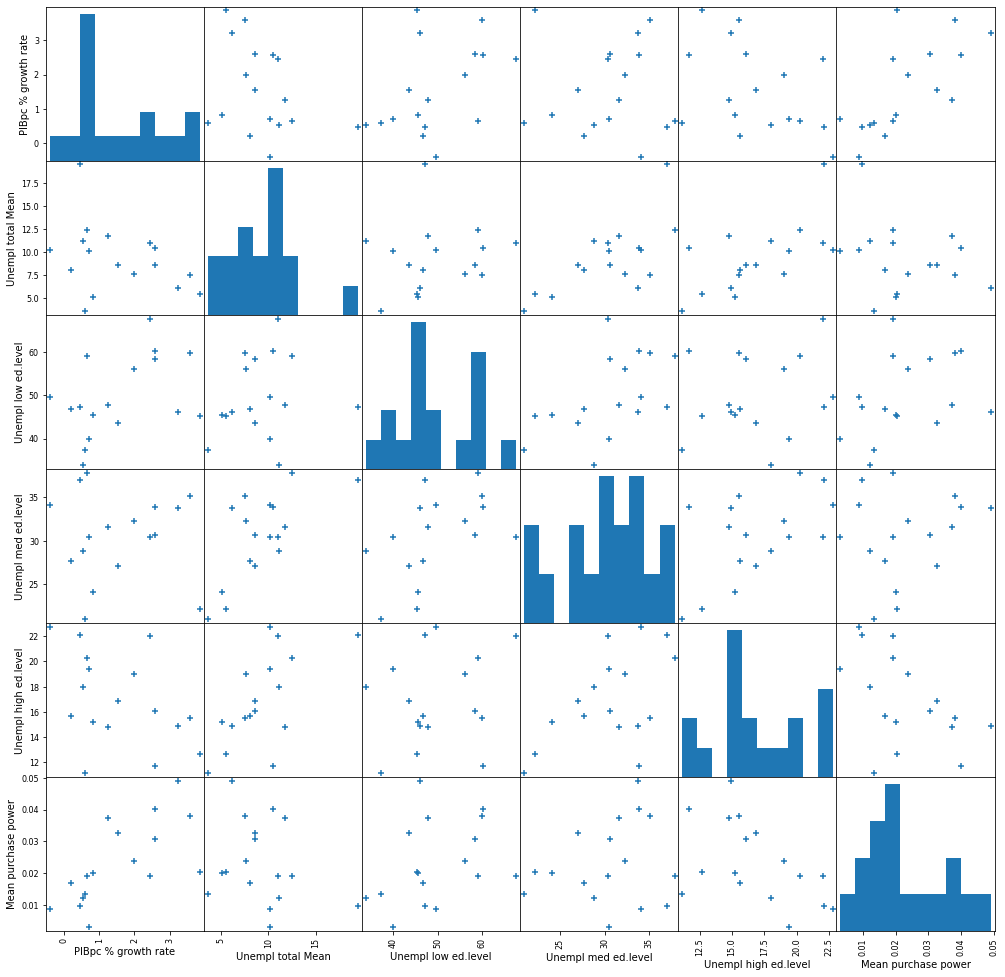

In [164]:
from pandas.plotting import scatter_matrix
sns.heatmap(df_pibpc.corr(),annot=True)
scatter_matrix(df_pibpc, alpha=1, figsize=(17, 17), diagonal="hist",grid=True,marker='+')


In [42]:
#realizamos un modelo de regresión donde podemos observar la contribución de las siguientes variables a la tasa de crecimiento del PIB 
#-Desempleo de las personas con un nivel de estudios superior (x3)
#-Desempleo de las personas sin estudios (x1)

from matplotlib import pyplot
import math
import numpy as np
import statsmodels.api as sm  ## Este proporciona funciones para la estimación demuchos modelos estadísticos
import statsmodels.formula.api as smf      
x1=(df_pibpc['Unempl low ed.level'])
x2=np.log(df_pibpc['Unempl med ed.level'])
x3=(df_pibpc['Unempl high ed.level'])
y=(df_pibpc['PIBpc % growth rate'])

mod=smf.ols('y~ x1+x3-1', data=df_pibpc).fit()
print(mod.summary())

#eliminamos x2 al no ser significativa. El modelo posee una capacidad de predicción bastante buena, aunque deberíamos realizar un análisis más profundo con los oportunos test para comprobar si la regresión es válida y cumple con todos los supuestos MCO para análisis de regresión. Obviamente dos variables no pueden predecir el crecimiento del PIB pc de un país, pero los resultados que arroja esta regresión son interesantes.

#Los resultados que muestran los coeficientes son interesantes, pues indica que al aumentar el desempleo de las personas con nivel de estudios superior en un 1%, la tasa de crecimiento del PIB para el periodo considerado caería un 0.17% aproximadamente. Lo contrario sucedería si aumentase el desempleo para las personas sin estudios, pues un aumento del 1% del desempleo de estos aumentaría la TVP del PIBpc para ese periodo. Esto podría tener sentido, pues confirma lo que el modelo de crecimiento clásico de Solow indica, y es que uno de los factores de crecimiento de un país lo compone el nivel de formación de su capital humano. 


                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.789
Model:                            OLS   Adj. R-squared (uncentered):              0.761
Method:                 Least Squares   F-statistic:                              28.00
Date:                Fri, 01 Jan 2021   Prob (F-statistic):                    8.64e-06
Time:                        12:40:20   Log-Likelihood:                         -22.700
No. Observations:                  17   AIC:                                      49.40
Df Residuals:                      15   BIC:                                      51.07
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [179]:
ruta6=r'\Users\Alberto\Documents\Big Data\BigData1\trabajo\business_active.csv'
df_businesss=pd.read_csv(ruta6,delimiter=',')
df_businesss=df_businesss.rename(columns={'geo\TIME_PERIOD':'Country Code'})
df_businesss=df_businesss.replace(': ','0')
df_businesss=df_businesss.replace(' d','',regex=True)
cols=['2008 ', '2009 ', '2010 ', '2011 ', '2012 ', '2013 ','2014 ', '2015 ', '2016 ', '2017 ', '2018 ']
df_businesss[cols]=df_businesss[cols].astype('float')


df_business=pd.pivot_table(df_businesss,index=['Country Code'])
df_business['Mean active businesses']=df_business.mean(axis='columns')
df_business=round(pd.pivot_table(df_business,index=['Country Code'],values=['Mean active businesses']),2)

df_pivot=df_business.merge(df_pibpc,on='Country Code',how='inner')
df_pivot 

Country Code  Mean active businesses  PIBpc % growth rate Country Name  \
0            AT               419362.18             0.816667      Austria   
1            BG               328566.82             2.595833     Bulgaria   
2            CY                47600.64             0.712500       Cyprus   
3            EE                79722.27             1.541667      Estonia   
4            ES              3058364.36             0.462500        Spain   
5            FI               290909.73             0.204167      Finland   
6            HR                94408.73             0.662500      Croatia   
7            HU               549701.73             1.975000      Hungary   
8            IT              3914147.18            -0.404167        Italy   
9            LT               163840.45             2.575000    Lithuania   
10           LV                97584.18             1.245833       Latvia   
11           MT                27941.18             3.866667        Malta   
12           NO               284629.18             0.595833       Norway   
13           PL              1988865.36             3.579167       Poland   
14           PT               858393.73             0.545833     Portugal   
15           RO               636257.09             3.225000      Romania   
16           SK               420943.91             2.454167     Slovakia   

    Unempl total Mean  Unempl low ed.level  Unempl med ed.level  \
0            5.108333            45.516667            24.033333   
1            8.591667            58.358333            30.608333   
2           10.150000            39.841667            30.475000   
3            8.550000            43.500000            27.041667   
4           19.516667            47.225000            37.008333   
5            8.025000            46.716667            27.683333   
6           12.450000            59.083333            37.875000   
7            7.675000            55.983333            32.241667   
8           10.191667            49.600000            34.116667   
9           10.441667            60.175000            33.858333   
10          11.708333            47.833333            31.625000   
11           5.466667            45.241667            22.158333   
12           3.583333            37.266667            20.925000   
13           7.491667            59.783333            35.125000   
14          11.158333            33.875000            28.800000   
15           6.108333            46.000000            33.808333   
16          11.041667            67.625000            30.383333   

    Unempl high ed.level  Mean purchase power  
0              15.191667             0.020023  
1              16.058333             0.030607  
2              19.408333             0.002983  
3              16.850000             0.032731  
4              22.066667             0.009579  
5              15.650000             0.016809  
6              20.266667             0.019112  
7              18.975000             0.023847  
8              22.758333             0.008679  
9              11.716667             0.040065  
10             14.791667             0.037226  
11             12.666667             0.020396  
12             11.150000             0.013476  
13             15.541667             0.038073  
14             17.975000             0.012239  
15             14.925000             0.049102  
16             21.991667             0.019042

In [116]:
ruta7=r'\Users\Alberto\Documents\Big Data\BigData1\trabajo\population.csv'
df_pop=pd.read_csv(ruta7,delimiter=',')

df_pop=df_pop.rename(columns={'geo\TIME_PERIOD':'Country Code'})
df_pop=df_pop.replace(': ','0')
df_pop=df_pop.replace('b','',regex=True)
df_pop=df_pop.replace('e','',regex=True)
df_pop=df_pop.replace('p','',regex=True)

cols=['2011 ', '2012 ', '2013 ','2014 ', '2015 ', '2016 ', '2017 ', '2018 ']
df_pop[cols]=df_pop[cols].astype('int')


df_pop['Mean Population']=df_pop.mean(axis='columns')
df_pop=pd.pivot_table(df_pop,index=['Country Code'],values=['Mean Population'])
df_pivot=df_pop.merge(df_pivot,on='Country Code',how='inner')

#df_pivot=df_pivot.drop(columns=['Mean Population_x', 'Mean Population_y','Mean Population_x', 'Mean Population_y'])
df_pivot['Firms per capita']=df_pivot['Mean active businesses']/df_pivot['Mean Population']
df_pivot=df_pivot.reindex(columns=['Country Code','Country Name','PIBpc % growth rate','Mean Population', 'Mean active businesses','Firms per capita', 'Unempl total Mean','Unempl low ed.level', 'Unempl med ed.level', 'Unempl high ed.level','Mean purchase power']) 
df_pivot

#graficamos la relación entre crecimiento de PIB pc con el desempleo de personas más formadas y lo relacionamos con la población. En general observamos que,los países que disfrutan de tasas de crecimiento de PIB más altas son aquellos que tienen un desempleo de los más cualificados menor.
fig=px.scatter(df_pivot,x='Unempl high ed.level',y='PIBpc % growth rate',hover_name='Country Name',size='Mean Population',title='Trade-off between PIB and Unemployment (High educated)')
fig2=px.scatter(df_pivot,x='Unempl total Mean',y='PIBpc % growth rate',hover_name='Country Name',size='Mean Population',title='Trade-off between PIB and Unemployment (Total)')
fig.show()
fig2.show()



In [127]:

ruta8=r'\Users\Alberto\Documents\Big Data\BigData1\trabajo\value.csv'
df_value=pd.read_csv(ruta8,delimiter=';',encoding='latin8')
df_value.replace('r','',regex=True)
cols=['2008', '2009', '2010', '2011','2012', '2013', '2014', '2015', '2016', '2017', '2018']
df_value[cols]=df_value[cols].astype('float')

df_value['Sum added value firms']=df_value.sum(axis='columns')
df_value_total=pd.pivot_table(df_value,index=['Country Code'],values=['Sum added value firms'])
df_value_sector=pd.pivot_table(df_value,index=['Country Code','sector'],values=['Sum added value firms'])
df_value_sector




Sum added value firms
Country Code sector                                                                 
AT           Accommoation an foo service activities                          91062.6
             Aministrative an support service activities                    113675.1
             Construction                                                   143595.5
             Electricity, gas, steam an aironitioning supply                 60387.5
             Information anommunication                                      98543.7
...                                                                              ...
UK           Professional, scientific an technical activities              1774984.6
             Realstate activities                                           444900.4
             Transportation and storage                                     914293.7
             Water supply                                                   218083.9
             Wholesale an retail trade                                     2146149.1

[419 rows x 1 columns]

In [134]:
#vamos a buscar qué sector es el más poderoso en cada país.
df_value_sector_country_max=df_value_sector.loc[df_value_sector.groupby('Country Code')['Sum added value firms'].idxmax()]
df_value_sector_country_max=pd.pivot_table(df_value_sector_country_max,index=['sector','Country Code']).sort_values(by=['sector','Sum added value firms'],ascending=False)
print(df_value_sector_country_max)

#imprimimos qué pais es el más poderoso en cada sector.
df_value_sector_max=df_value_sector.loc[df_value_sector.groupby('sector')['Sum added value firms'].idxmax()]
df_value_sector_max=pd.pivot_table(df_value_sector_max,index=['sector','Country Code']).sort_values(by=['sector','Sum added value firms'],ascending=False)
df_value_sector_max


df_value_sector_country_max.loc['Wholesale an retail trade'].plot(kind='bar')
plt.title('Wholesale an retail')
df_value_sector_country_max.loc['Manufacturing'].plot(kind='bar')
plt.title('Manufacturing')


df_value_sector_max.plot(subplots=True,kind='pie',legend=None,autopct='%.2f',figsize=(15,15),fontsize=20,shadow=True)
plt.title('Most EU contributors per sector')
pylab.ylabel('')

fig = px.pie(df_value, values='Sum added value firms', names='Country Code',title='Valor añadido de las empresas')
fig.show()

                                        Sum added value firms
sector                    Country Code                       
Wholesale an retail trade UK                        2146149.1
                          NL                         807963.4
                          EL                         172050.5
                          LU                          53352.8
                          LV                          24651.0
                          CY                          21989.8
                          BA                          12314.4
                          MT                           9085.0
                          MK                           5225.2
Mining an quarrying       NO                         727494.3
Manufacturing             DE                        5620601.3
                          IT                        2334012.8
                          FR                        2263613.2
                          ES                        1162868.4
        

KeyError: 'Professional, scientific an technical activities'

In [135]:
df_value_sector_max

Sum added value firms
sector                                           Country Code                       
Wholesale an retail trade                        DE                        2941241.6
Water supply                                     UK                         218083.9
Transportation and storage                       DE                        1078545.1
Realstate activities                             DE                         763120.4
Professional, scientific an technical activities UK                        1774984.6
Mining an quarrying                              NO                         727494.3
Manufacturing                                    DE                        5620601.3
Information anommunication                       UK                        1359949.1
Electricity, gas, steam an aironitioning supply  DE                         352677.6
Construction                                     UK                         904449.0
Aministrative an support service activities      UK                        1261379.2
Accommoation an foo service activities           UK                         504281.1

Text(0.5, 1.0, 'RO')

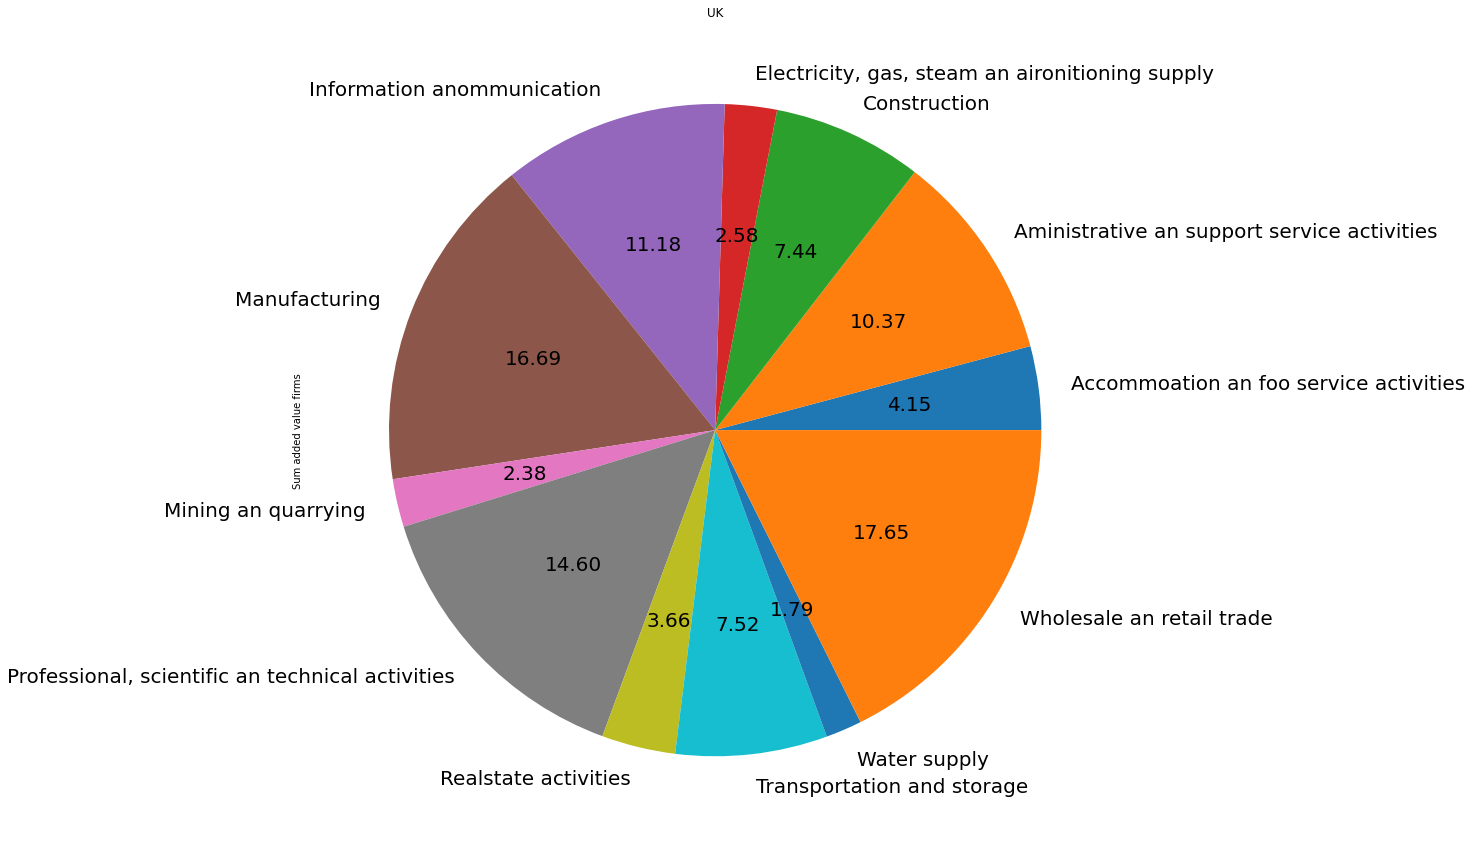

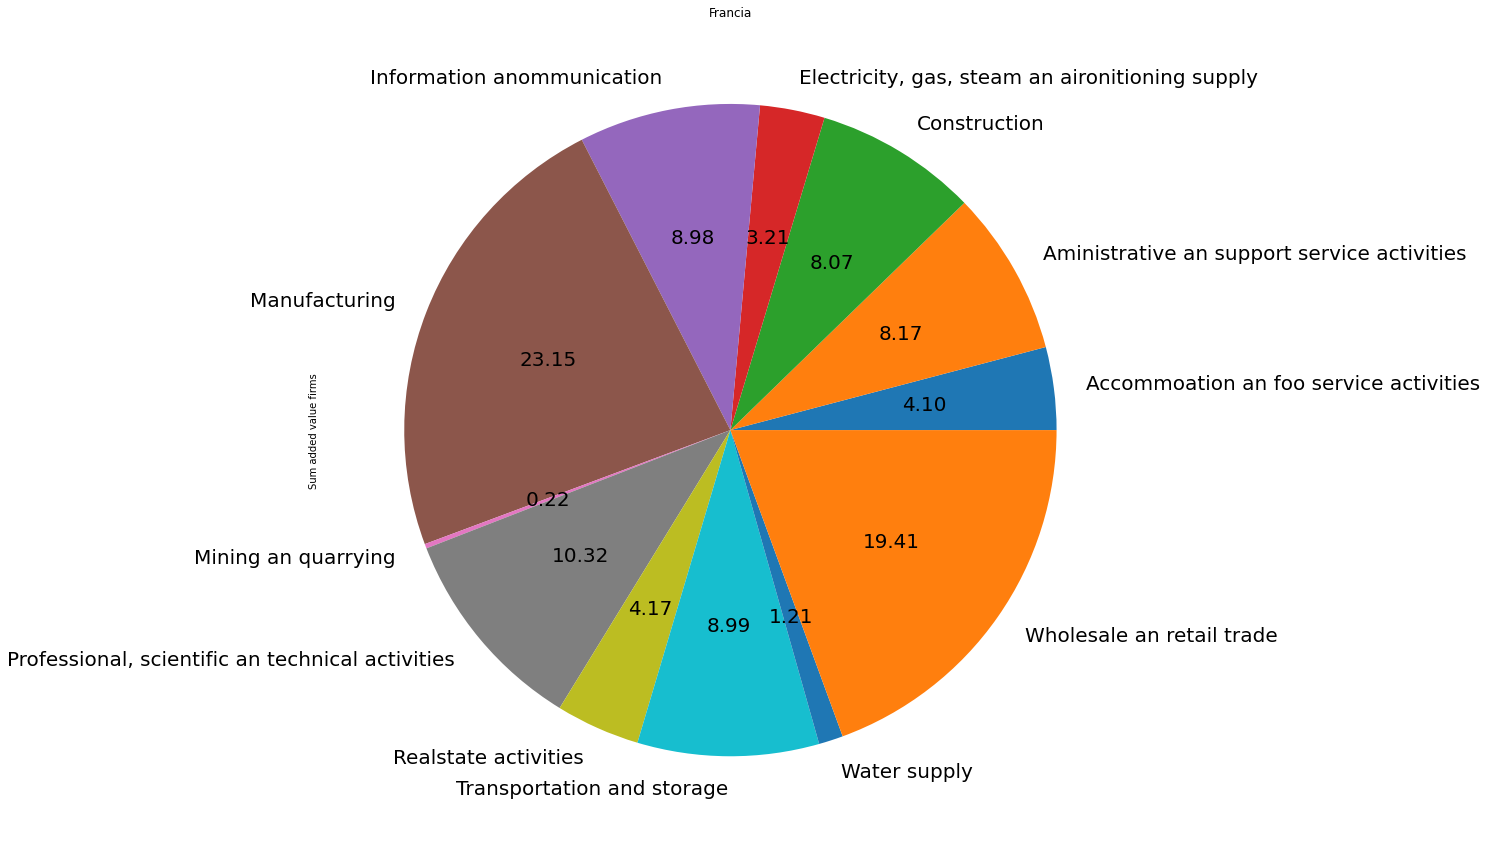

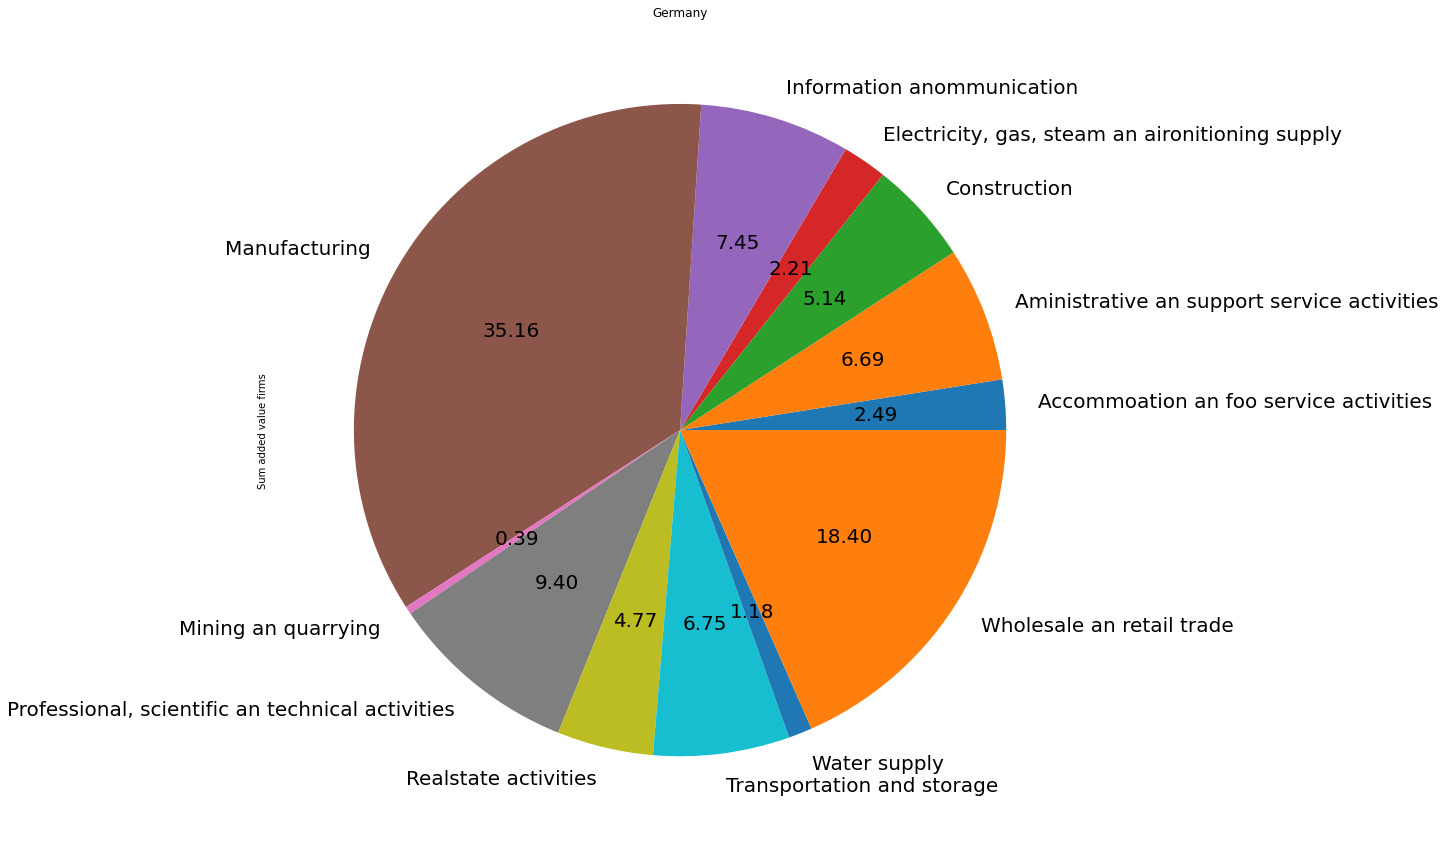

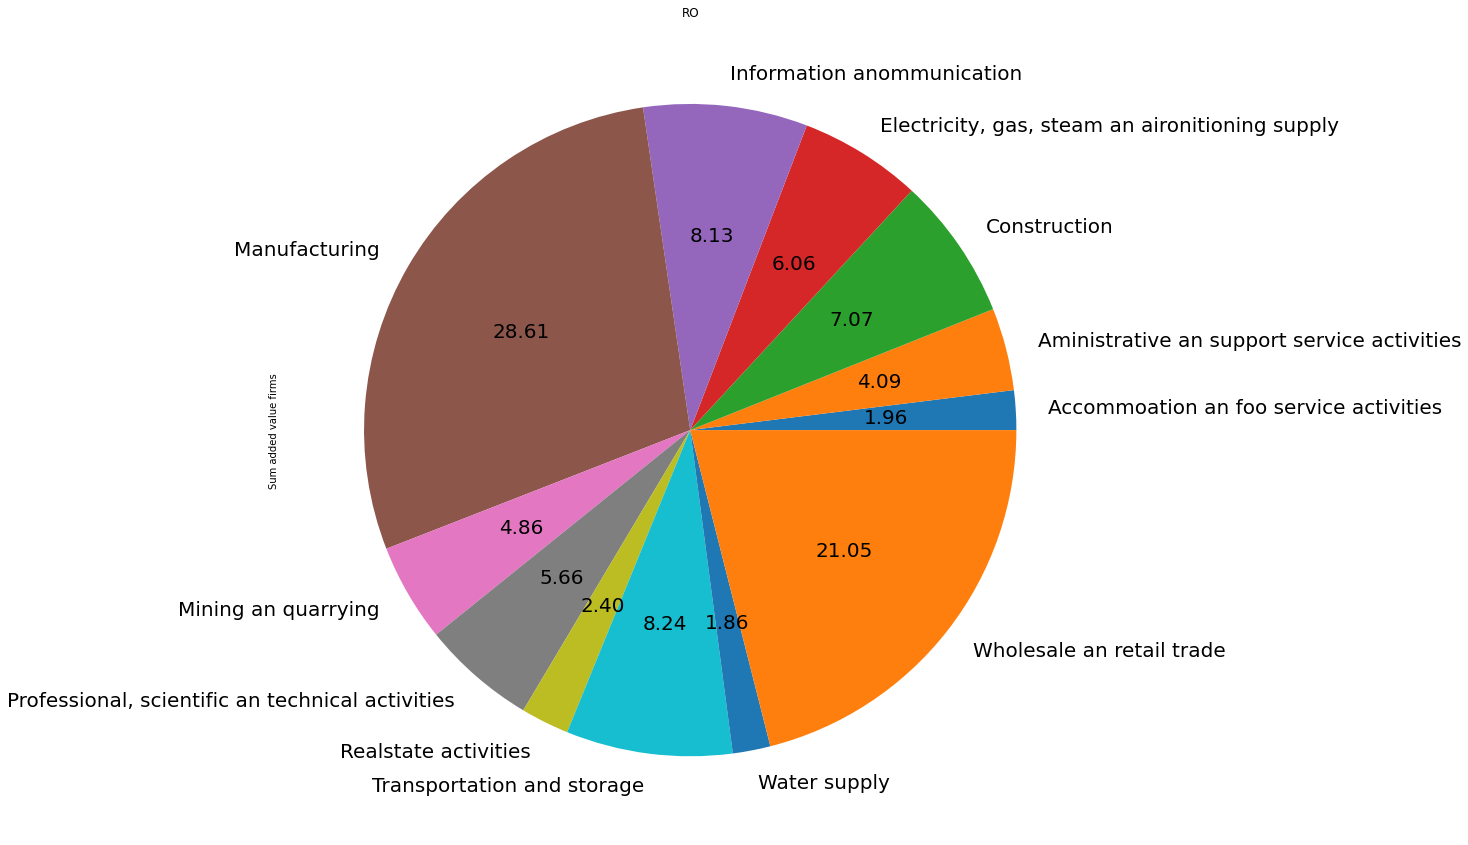

In [133]:
df_value_sector_ES=df_value_sector.loc['UK'].plot.pie(subplots=True,legend=None,autopct='%.2f',figsize=(15,15),fontsize=20)
plt.title('UK')

df_value_sector_NO=df_value_sector.loc['FR'].plot.pie(subplots=True,legend=None,autopct='%.2f',figsize=(15,15),fontsize=20)
plt.title('Francia')
df_value_sector_DE=df_value_sector.loc['DE'].plot.pie(subplots=True,legend=None,autopct='%.2f',figsize=(15,15),fontsize=20)
plt.title('Germany')
df_value_sector_IS=df_value_sector.loc['RO'].plot.pie(subplots=True,legend=None,autopct='%.2f',figsize=(15,15),fontsize=20)
plt.title('RO')



In [122]:
#vamos a ver la contribución de los principales componentes del PIB por países. El PIB,a grosso modo, se puede descomponer en: PIB=Consumo + GastoPublico + Inversion + ExportacionesNetas

#tabla PIB
rutapib=r'\Users\Alberto\Documents\Big Data\BigData1\trabajo\pib\pib.csv'
df_pib=pd.read_csv(rutapib,delimiter=',',encoding='latin8')
x=df_pib['unit;geo\TIME_PERIOD'].str.split(';',expand=True)
df_pib['Country Code']=x[1]
df_pib=df_pib.drop(columns='unit;geo\TIME_PERIOD')
df_pib=df_pib.replace(': ','0')
df_pib=df_pib.replace('b','',regex=True)
df_pib=df_pib.replace('p','',regex=True)
df_pib=df_pib.replace('e','',regex=True)

cols=['2008 ', '2009 ', '2010 ', '2011 ', '2012 ', '2013 ', '2014 ', '2015 ','2016 ', '2017 ', '2018 ', '2019 ']
df_pib[cols]=df_pib[cols].astype('float')

df_pib_val=pd.pivot_table(df_pib,index=['Country Code'])
df_pib=df_pib_val.pct_change(periods=11,axis='columns')
df_pib=df_pib['2019 ']
df_pib=df_pib.to_frame()
df_pib=df_pib.rename(columns={'2019 ':'TVP PIB 08-19'})
df_pib

#TABLA CONSUMO
rutaconsumo=r'\Users\Alberto\Documents\Big Data\BigData1\trabajo\pib\consumo.csv'
df_c=pd.read_csv(rutaconsumo,delimiter=',',encoding='latin8')
x=df_c['geo\TIME_PERIOD'].str.split(';',expand=True)
df_c=df_c.rename(columns={'geo\TIME_PERIOD':'Country Code'})
df_c=df_c.replace(': ','0')
df_c=df_c.replace('b','',regex=True)
df_c=df_c.replace('p','',regex=True)
df_c=df_c.replace('e','',regex=True)
df_c=df_c.replace('d','',regex=True)
df_c[cols]=df_c[cols].astype('float')

cols=['2008 ', '2009 ', '2010 ', '2011 ', '2012 ', '2013 ', '2014 ', '2015 ','2016 ', '2017 ', '2018 ', '2019 ']
df_c[cols]=df_c[cols].astype('float')

df_c_val=pd.pivot_table(df_c,index=['Country Code'])
df_c=df_c_val.pct_change(periods=11,axis='columns')
df_c=df_c['2019 ']
df_c=df_c.to_frame()
df_c=df_c.rename(columns={'2019 ':'TVP Consumo 08-19'})
df_c['Consumo %PIB']=df_c_val.mean(axis='columns')/df_pib_val.mean(axis='columns')
df_c

#tabla gasto publico
rutagp=r'\Users\Alberto\Documents\Big Data\BigData1\trabajo\pib\gastopublico.csv'
df_gp=pd.read_csv(rutagp,delimiter=',',encoding='latin8')
x=df_gp['geo\TIME_PERIOD'].str.split(';',expand=True)
df_gp=df_gp.rename(columns={'geo\TIME_PERIOD':'Country Code'})
df_gp=df_gp.replace(': ','0')
df_gp=df_gp.replace('b','',regex=True)
df_gp=df_gp.replace('p','',regex=True)
df_gp=df_gp.replace('e','',regex=True)
df_gp=df_gp.replace('d','',regex=True)
df_gp[cols]=df_gp[cols].astype('float')

cols=['2008 ', '2009 ', '2010 ', '2011 ', '2012 ', '2013 ', '2014 ', '2015 ','2016 ', '2017 ', '2018 ', '2019 ']
df_gp[cols]=df_gp[cols].astype('float')

df_gp_val=pd.pivot_table(df_gp,index=['Country Code'])
df_gp=df_gp_val.pct_change(periods=11,axis='columns')
df_gp=df_gp['2019 ']
df_gp=df_gp.to_frame()
df_gp=df_gp.rename(columns={'2019 ':'TVP GastoPublico 08-19'})
df_gp['GastoPublico %PIB']=df_gp_val.mean(axis='columns')/df_pib_val.mean(axis='columns')
df_gp

#tabla Inversion
rutainv=r'\Users\Alberto\Documents\Big Data\BigData1\trabajo\pib\inversion.csv'
df_inv=pd.read_csv(rutainv,delimiter=',',encoding='latin8')
x=df_inv['geo\TIME_PERIOD'].str.split(';',expand=True)
df_inv=df_inv.rename(columns={'geo\TIME_PERIOD':'Country Code'})
df_inv=df_inv.replace(': ','0')
df_inv=df_inv.replace('b','',regex=True)
df_inv=df_inv.replace('p','',regex=True)
df_inv=df_inv.replace('e','',regex=True)
df_inv=df_inv.replace('d','',regex=True)
df_inv[cols]=df_inv[cols].astype('float')

cols=['2008 ', '2009 ', '2010 ', '2011 ', '2012 ', '2013 ', '2014 ', '2015 ','2016 ', '2017 ', '2018 ', '2019 ']
df_inv[cols]=df_inv[cols].astype('float')

df_inv_val=pd.pivot_table(df_inv,index=['Country Code'])
df_inv=df_inv_val.pct_change(periods=11,axis='columns')
df_inv=df_inv['2019 ']
df_inv=df_inv.to_frame()
df_inv=df_inv.rename(columns={'2019 ':'TVP Inversion 08-19'})
df_inv['Inversion %PIB']=df_inv_val.mean(axis='columns')/df_pib_val.mean(axis='columns')
df_inv

#tabla Exportaciones e Importaciones. 
rutaxn=r'\Users\Alberto\Documents\Big Data\BigData1\trabajo\pib\XN.csv'
df_xn=pd.read_csv(rutaxn,delimiter=',',encoding='latin8')
x=df_xn['type;geo\TIME_PERIOD'].str.split(';',expand=True)
df_xn['Tipo']=x[0]
df_xn['Country Code']=x[1]
df_xn=df_xn.drop(columns=['type;geo\TIME_PERIOD'])
df_xn=df_xn.replace(': ','0')
df_xn=df_xn.replace('b','',regex=True)
df_xn=df_xn.replace('p','',regex=True)
df_xn=df_xn.replace('e','',regex=True)
df_xn=df_xn.replace('d','',regex=True)

cols=['2008 ', '2009 ', '2010 ', '2011 ', '2012 ', '2013 ', '2014 ', '2015 ','2016 ', '2017 ', '2018 ', '2019 ']
df_xn[cols]=df_xn[cols].astype('float')

df_xn_val=pd.pivot_table(df_xn,index=['Tipo','Country Code'])
df_xn=df_xn_val.pct_change(periods=11,axis='columns')
df_xn=df_xn['2019 ']
df_xn=df_xn.to_frame()
df_xn=df_xn.rename(columns={'2019 ':'TVP X/I 08-19'})
df_xn['XN %PIB']=df_xn_val.mean(axis='columns')/df_pib_val.mean(axis='columns')

#separamos entre exportaciones e importaciones
df_x=df_xn.loc['Exortacions']
df_x=df_x.rename(columns={'TVP X/I 08-19':'TVP X 08-19'})
df_x=df_x.rename(columns={'XN %PIB':'X %PIB'})

df_i=df_xn.loc['Imortacions']
df_i=df_i.rename(columns={'TVP X/I 08-19':'TVP M 08-19'})
df_i=df_i.rename(columns={'XN %PIB':'M %PIB'})

#función para extraer datos de dos países y compararlos gráficamente
def tablapaispib(pais1,pais2):

    x1=df_c.merge(df_inv,on='Country Code')
    x2=x1.merge(df_gp,on='Country Code')
    x3=x2.merge(df_x,on='Country Code')
    x4=x3.merge(df_i,on='Country Code')
    x5=x4.loc[pais1]
    x6=x4.loc[pais2]

    grafopais1=x5.plot.bar()
    plt.title(f'{pais1}')
    plt.show()
    grafopais2=x6.plot.bar()
    plt.title(f'{pais2}')
    plt.show()
    print('Datos país',pais1,'\n\n',x5,'\n\n', 'Datos país',pais2,'\n\n', x6, '\n\n')
    return x4
    




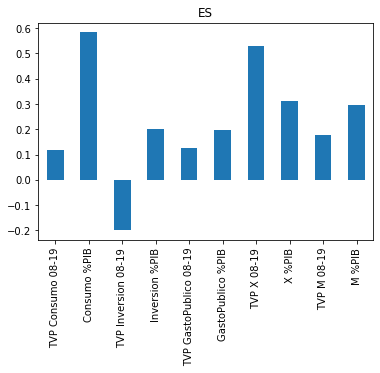

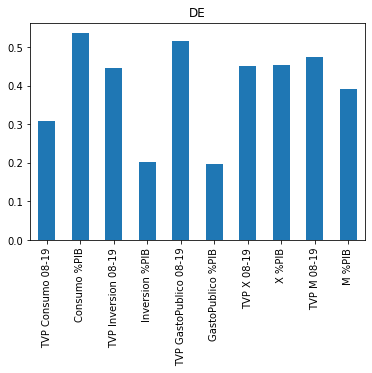

Datos país ES 

 TVP Consumo 08-19         0.119659
Consumo %PIB              0.582548
TVP Inversion 08-19      -0.199215
Inversion %PIB            0.200532
TVP GastoPublico 08-19    0.124908
GastoPublico %PIB         0.195470
TVP X 08-19               0.527695
X %PIB                    0.313262
TVP M 08-19               0.178195
M %PIB                    0.297144
Name: ES, dtype: float64 

 Datos país DE 

 TVP Consumo 08-19         0.308544
Consumo %PIB              0.536817
TVP Inversion 08-19       0.446745
Inversion %PIB            0.203300
TVP GastoPublico 08-19    0.515535
GastoPublico %PIB         0.196408
TVP X 08-19               0.450102
X %PIB                    0.453278
TVP M 08-19               0.475445
M %PIB                    0.391409
Name: DE, dtype: float64 




TVP Consumo 08-19  Consumo %PIB  TVP Inversion 08-19  \
Country Code                                                         
AL                     0.497313      0.799400             0.028417   
AT                     0.350093      0.527667             0.435213   
BA                     0.214364      0.817440             0.085540   
BE                     0.371796      0.515518             0.356440   
BG                     0.476460      0.618465            -0.067463   
CH                     0.671542      0.523759             0.644869   
CY                     0.134683      0.660163            -0.162829   
CZ                     0.380077      0.481207             0.238432   
DE                     0.308544      0.536817             0.446745   
DK                     0.258935      0.472116             0.238363   
EA                     0.223486      0.548061             0.217748   
EE                     0.559717      0.508878             0.424449   
EL                    -0.220861      0.687379            -0.677420   
ES                     0.119659      0.582548            -0.199215   
FI                     0.315337      0.531403             0.206733   
FR                     0.200972      0.544473             0.219036   
HR                     0.077450      0.596855            -0.157047   
HU                     0.235484      0.512565             0.572362   
IE                     0.149847      0.378719             2.489524   
IS                     0.931971      0.509303             0.564453   
IT                     0.105999      0.604927            -0.072548   
LT                     0.395949      0.627109             0.225048   
LU                     0.492629      0.309589             0.387381   
LV                     0.285651      0.602522            -0.135312   
ME                     0.266478      0.788376             0.110764   
MK                     0.382533      0.704633             0.361500   
MT                     0.666263      0.522598             1.348050   
NL                     0.200753      0.450034             0.188332   
NO                     0.320572      0.420410             0.294966   
PL                     0.350780      0.598673             0.165543   
PT                     0.149324      0.653272            -0.051059   
RO                     0.516486      0.629772            -0.034333   
RS                     0.167227      0.726450             0.220607   
SE                     0.341826      0.462506             0.331062   
SI                     0.309964      0.542326            -0.148972   
SK                     0.433934      0.559777             0.228042   
TR                     0.202879      0.601067             0.253948   
UK                     0.258995      0.643991             0.305268   
XK                     0.668261      0.853448             0.936259   

              Inversion %PIB  TVP GastoPublico 08-19  GastoPublico %PIB  \
Country Code                                                              
AL                  0.263501                0.721480           0.111664   
AT                  0.230824                0.365756           0.197731   
BA                  0.193690                0.217799           0.217901   
BE                  0.231464                0.375837           0.235904   
BG                  0.214477                0.609687           0.163920   
CH                  0.252670                0.788111           0.112001   
CY                  0.189129                0.138670           0.170709   
CZ                  0.263394                0.425719           0.195101   
DE                  0.203300                0.515535           0.196408   
DK                  0.202774                0.229760           0.255745   
EA                  0.206605                0.283460           0.209229   
EE                  0.256026                0.794920           0.195660   
EL                  0.140872               -0.279065           0.211173   
ES                

In [123]:
tablapaispib('ES','DE')

In [119]:
#hacemos un modelo de regresión basado en las tasas de crecimiento.
   

pib=(df_pib['TVP PIB 08-19'])
c=(df_c['TVP Consumo 08-19'])
gp=(df_gp['TVP GastoPublico 08-19'])
inv=(df_inv['TVP Inversion 08-19'])
x=(df_x['TVP X 08-19'])
m=(df_i['TVP M 08-19'])

mod=smf.ols('pib~ c+gp+inv+x+m-1', data=df_pib).fit()
print(mod.summary())

                                 OLS Regression Results                                
Dep. Variable:                    pib   R-squared (uncentered):                   0.974
Model:                            OLS   Adj. R-squared (uncentered):              0.971
Method:                 Least Squares   F-statistic:                              259.7
Date:                Sun, 03 Jan 2021   Prob (F-statistic):                    4.65e-26
Time:                        20:54:06   Log-Likelihood:                          43.925
No. Observations:                  39   AIC:                                     -77.85
Df Residuals:                      34   BIC:                                     -69.53
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [120]:

#hacemos un modelo de regresión basado en las variables en niveles.
    

pib=df_pib_val.mean(axis='columns')
c=df_c_val.mean(axis='columns')
gp=df_gp_val.mean(axis='columns')
inv=df_inv_val.mean(axis='columns')
x=df_xn_val.mean(axis='columns').loc['Exortacions']
m=df_xn_val.mean(axis='columns').loc['Imortacions']

mod=smf.ols('pib~ c+gp+inv+x+m-1', data=df_pib).fit()
print(mod.summary())

                                 OLS Regression Results                                
Dep. Variable:                    pib   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          4.913e+06
Date:                Sun, 03 Jan 2021   Prob (F-statistic):                    1.47e-98
Time:                        20:54:13   Log-Likelihood:                         -354.65
No. Observations:                  39   AIC:                                      719.3
Df Residuals:                      34   BIC:                                      727.6
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------